### Plotting "Confirmed Patient density" in California By County

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import geopandas as gpd

#### Importing Mask Data set that has data for total confirmed patients and population by County

In [2]:
# importing the county cases mask data
data_mask = pd.read_csv('../clean_data/cases_with_mask_use.csv')

In [3]:
data_mask.head()

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population
0,Santa Clara,151.0,6.0,151,6,2020-03-18,0.015,0.014,0.04,0.168,0.764,1927852
1,Santa Clara,183.0,8.0,32,2,2020-03-19,0.015,0.014,0.04,0.168,0.764,1927852
2,Santa Clara,246.0,8.0,63,0,2020-03-20,0.015,0.014,0.04,0.168,0.764,1927852
3,Santa Clara,269.0,10.0,23,2,2020-03-21,0.015,0.014,0.04,0.168,0.764,1927852
4,Santa Clara,284.0,13.0,15,3,2020-03-22,0.015,0.014,0.04,0.168,0.764,1927852


#### Creating Confirmed population density column

In [4]:
# create a data frame to get by county confirmed patients.
df_confirm = data_mask[data_mask['date']== '2021-01-24'][['county','totalcountconfirmed' , 'population']]
df_confirm['confirm_percent'] = (df_confirm['totalcountconfirmed'])*100 / (df_confirm['population'])
df_confirm.set_index('county' , inplace = True)

In [5]:
# create a data frame to get by county confirmed patients.
#df_confirm = pd.DataFrame(data_mask.groupby(by = 'county')['totalcountconfirmed'].max())
#df_confirm['population'] = data_mask.groupby(by = 'county')['population'].max()
#df_confirm['confirm_percent'] = (df_confirm['totalcountconfirmed'])*100 / (df_confirm['population'])

In [6]:
# lets take a look at the data
df_confirm.head()

,totalcountconfirmed,population,confirm_percent
county,,,
Santa Clara,98103.0,1927852,5.088721
San Mateo,33956.0,766573,4.429585
Santa Barbara,26735.0,446499,5.987695
Tuolumne,3416.0,54478,6.270421
Sierra,42.0,3005,1.397671


#### Using Geopandas for plotting

In [7]:
# set the filepath and load in a shapefile
map_df = gpd.read_file('../data/CA_Counties/CA_Counties_TIGER2016.shp')

In [8]:
map_df.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,091,00277310,06091,Sierra,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312..."
1,06,067,00277298,06067,Sacramento,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511..."
2,06,083,00277306,06083,Santa Barbara,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13..."
3,06,009,01675885,06009,Calaveras,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534..."
4,06,111,00277320,06111,Ventura,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13..."


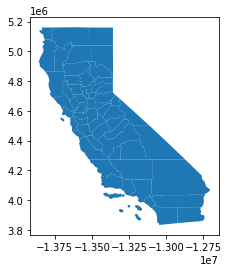

In [9]:
map_df.plot();

#### join the geodataframe with the cleaned up csv dataframe

In [10]:
merged = map_df.set_index('NAME').join(df_confirm)

In [11]:
merged.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,totalcountconfirmed,population,confirm_percent
NAME,,,,,,,,,,,,,,,,,,,,
Sierra,06,091,00277310,06091,Sierra County,06,H1,G4020,None,None,None,A,2468694587,23299110,+39.5769252,-120.5219926,"POLYGON ((-13431319.751 4821511.426, -13431312...",42.0,3005,1.397671
Sacramento,06,067,00277298,06067,Sacramento County,06,H1,G4020,472,40900,None,A,2499183617,76073827,+38.4500114,-121.3404409,"POLYGON ((-13490651.476 4680831.603, -13490511...",84110.0,1552058,5.419256
Santa Barbara,06,083,00277306,06083,Santa Barbara County,06,H1,G4020,None,42200,None,A,7084000598,2729814515,+34.5370572,-120.0399729,"MULTIPOLYGON (((-13423116.772 4042044.149, -13...",26735.0,446499,5.987695
Calaveras,06,009,01675885,06009,Calaveras County,06,H1,G4020,None,None,None,A,2641820834,43806026,+38.1838996,-120.5614415,"POLYGON ((-13428575.483 4627725.228, -13428534...",1704.0,45905,3.712014
Ventura,06,111,00277320,06111,Ventura County,06,H1,G4020,348,37100,None,A,4773390489,945942791,+34.3587415,-119.1331432,"MULTIPOLYGON (((-13317853.594 3931602.414, -13...",66347.0,846006,7.842379


In [12]:
merged["confirm_percent"].describe()

count    58.000000
mean      6.338709
std       3.032444
min       1.397671
25%       4.285541
50%       5.921240
75%       7.957626
max      15.791712
Name: confirm_percent, dtype: float64

#### Plotting the density data by County

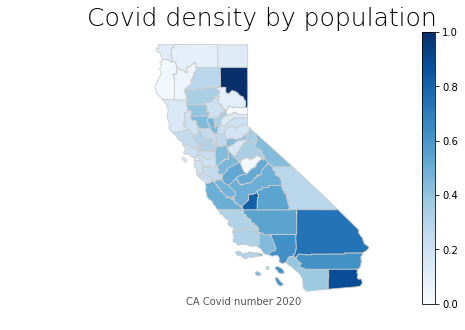

In [24]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'confirm_percent'

# set the range for the choropleth
vmin, vmax = 0 , 1

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 5))

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

# Now we can customise and add annotations

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Covid density by population', \
              fontdict={'fontsize': '25',
                        'fontweight' : '3'})

# create an annotation for the  data source
ax.annotate('CA Covid number 2020',
           xy=(0.4, 0.1), xycoords='figure fraction',
           horizontalalignment='left', verticalalignment='top',
           fontsize=10, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

# this will save the figure as a high-res png. you can also save as svg
fig.savefig('../images/covid_density_by_population.png')